In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Thyroid_diff.csv')

In [3]:
df

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


In [4]:
for cols in df.columns:
    print(f"Column Name: {cols}")
    print(df[cols].unique())
    print("="*100)

Column Name: Age
[27 34 30 62 52 41 46 51 40 75 59 49 50 76 42 44 43 36 70 60 33 26 37 55
 31 45 20 38 29 25 21 23 24 35 54 22 69 28 17 73 18 39 57 66 32 47 56 63
 19 67 72 61 68 48 81 53 58 80 79 65 15 82 71 64 78]
Column Name: Gender
['F' 'M']
Column Name: Smoking
['No' 'Yes']
Column Name: Hx Smoking
['No' 'Yes']
Column Name: Hx Radiothreapy
['No' 'Yes']
Column Name: Thyroid Function
['Euthyroid' 'Clinical Hyperthyroidism' 'Clinical Hypothyroidism'
 'Subclinical Hyperthyroidism' 'Subclinical Hypothyroidism']
Column Name: Physical Examination
['Single nodular goiter-left' 'Multinodular goiter'
 'Single nodular goiter-right' 'Normal' 'Diffuse goiter']
Column Name: Adenopathy
['No' 'Right' 'Extensive' 'Left' 'Bilateral' 'Posterior']
Column Name: Pathology
['Micropapillary' 'Papillary' 'Follicular' 'Hurthel cell']
Column Name: Focality
['Uni-Focal' 'Multi-Focal']
Column Name: Risk
['Low' 'Intermediate' 'High']
Column Name: T
['T1a' 'T1b' 'T2' 'T3a' 'T3b' 'T4a' 'T4b']
Column Name: N
['N0'

<Axes: >

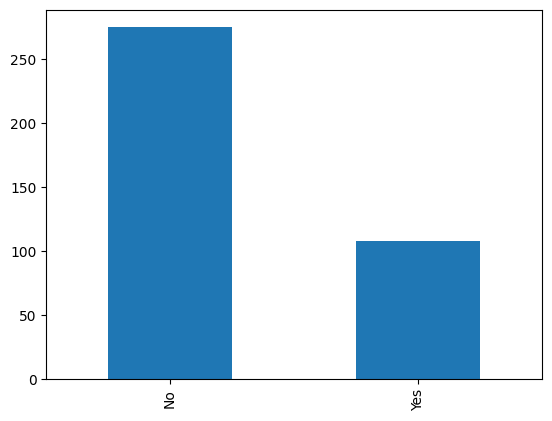

In [5]:
df['Recurred'].value_counts().plot(kind='bar')


In [6]:
df.isnull().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

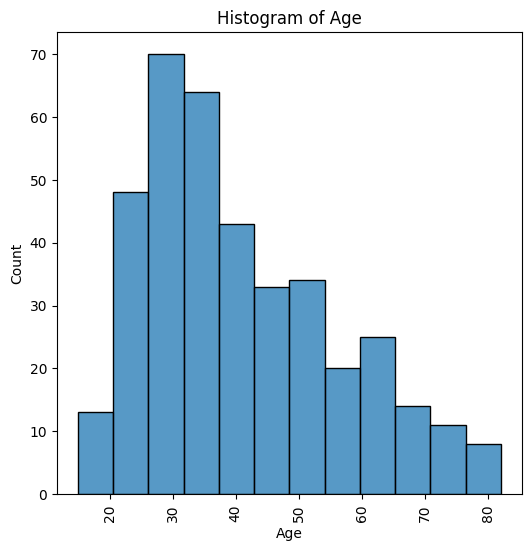

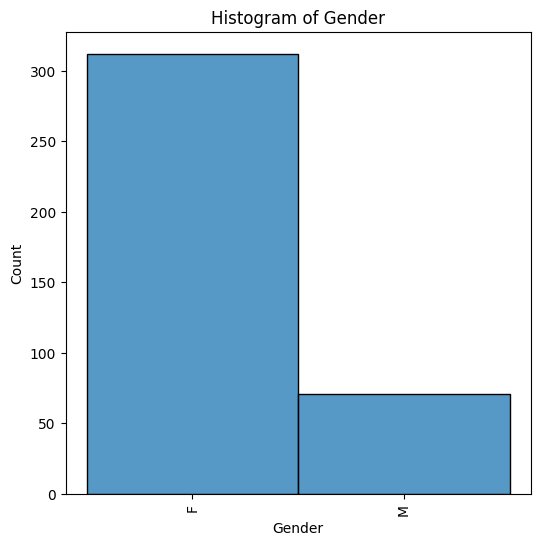

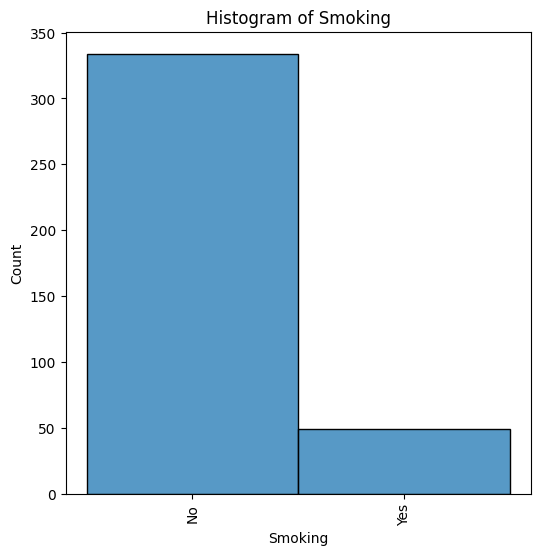

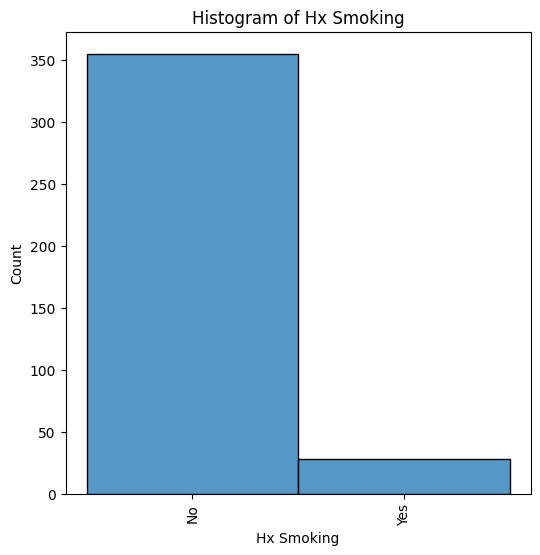

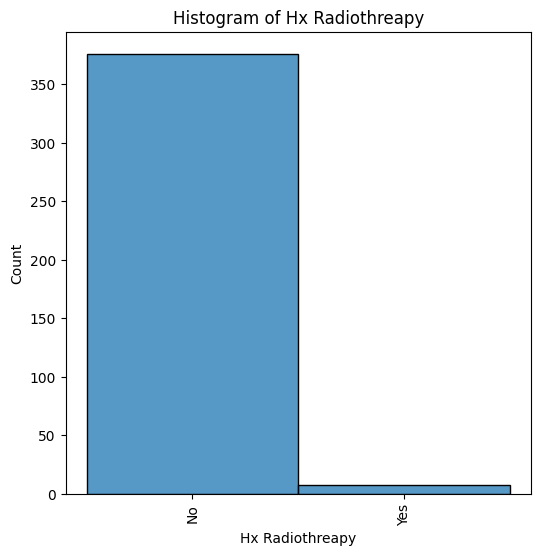

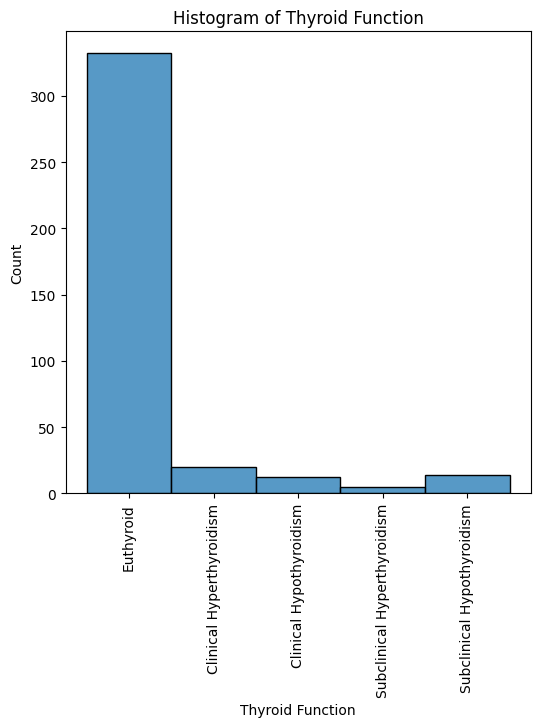

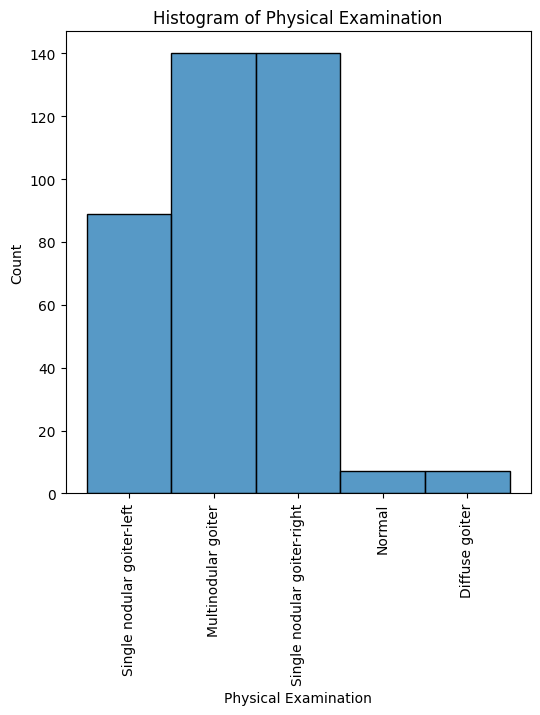

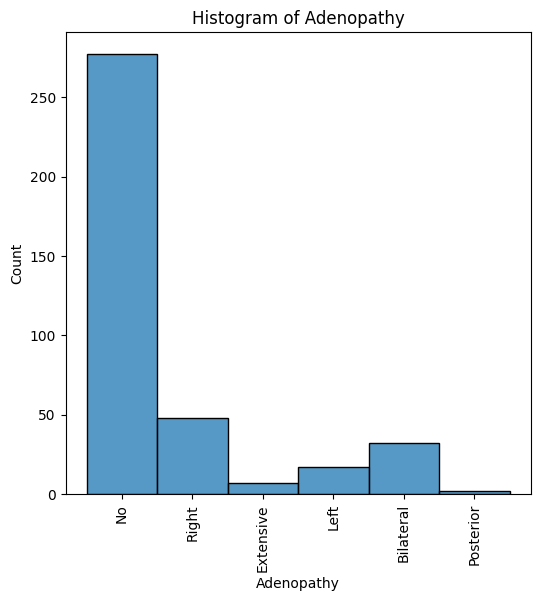

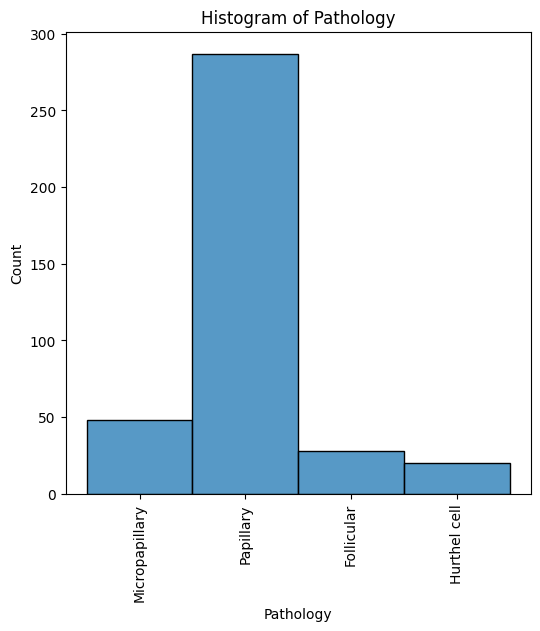

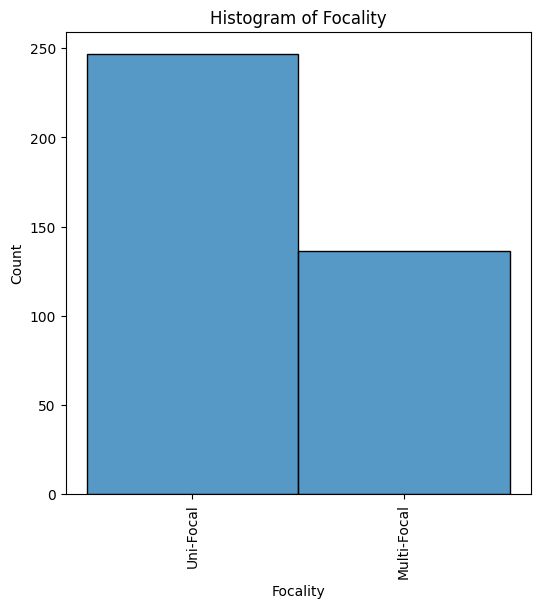

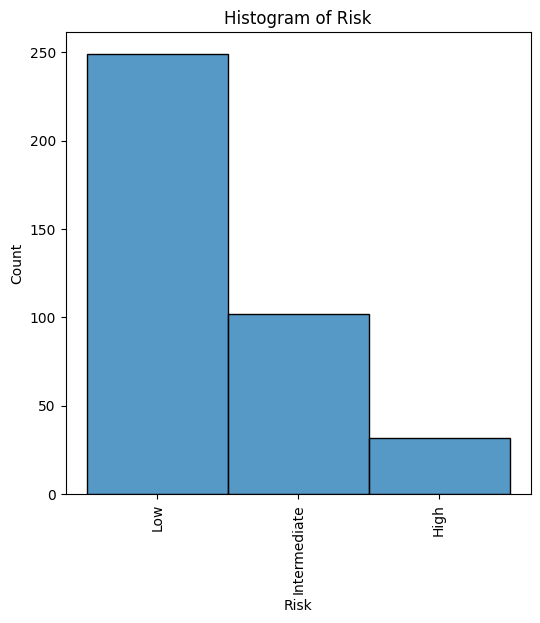

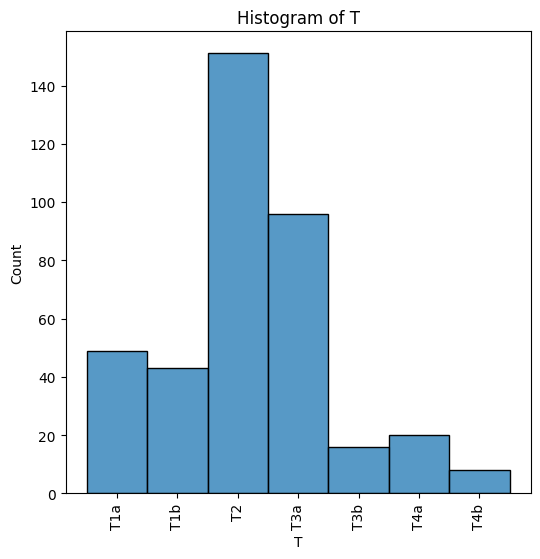

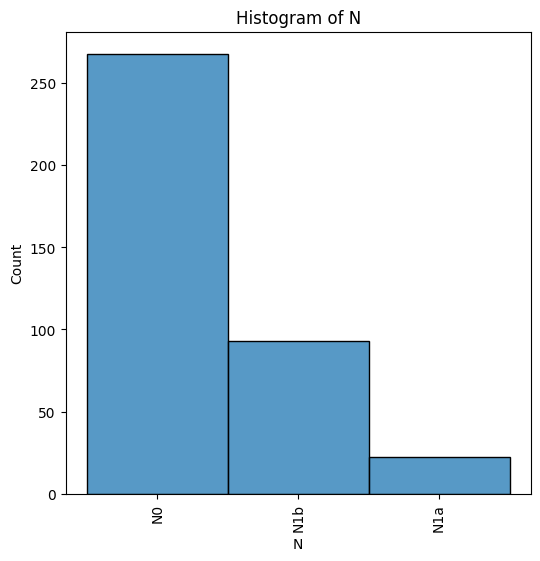

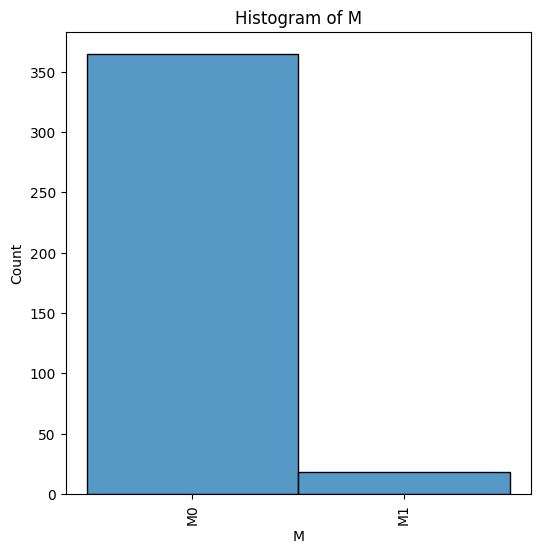

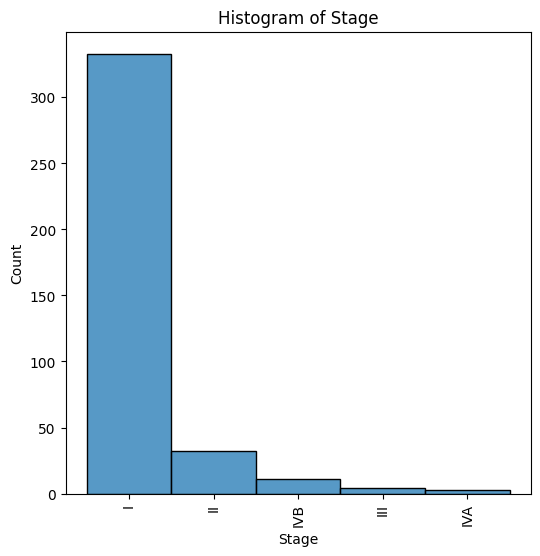

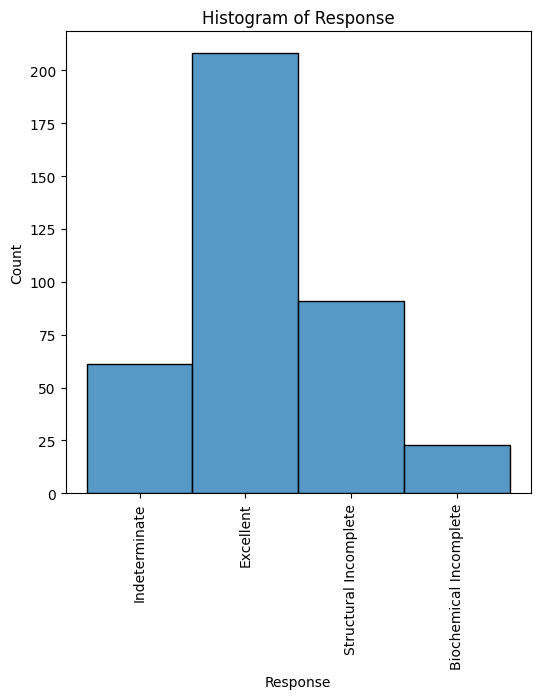

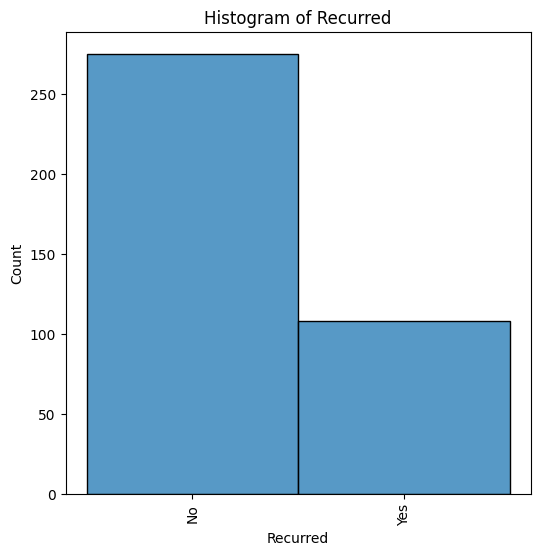

In [7]:
for cols in df.columns:
    plt.figure(figsize=(6,6))
    sns.histplot(df[cols])
    plt.title(f"Histogram of {cols}")
    plt.xticks(rotation=90)

C:\Users\Aryan raina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


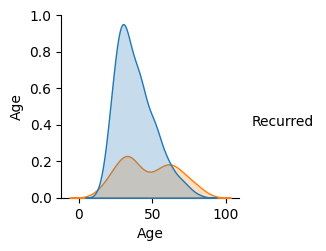

In [8]:
sns.pairplot(df,hue='Recurred')

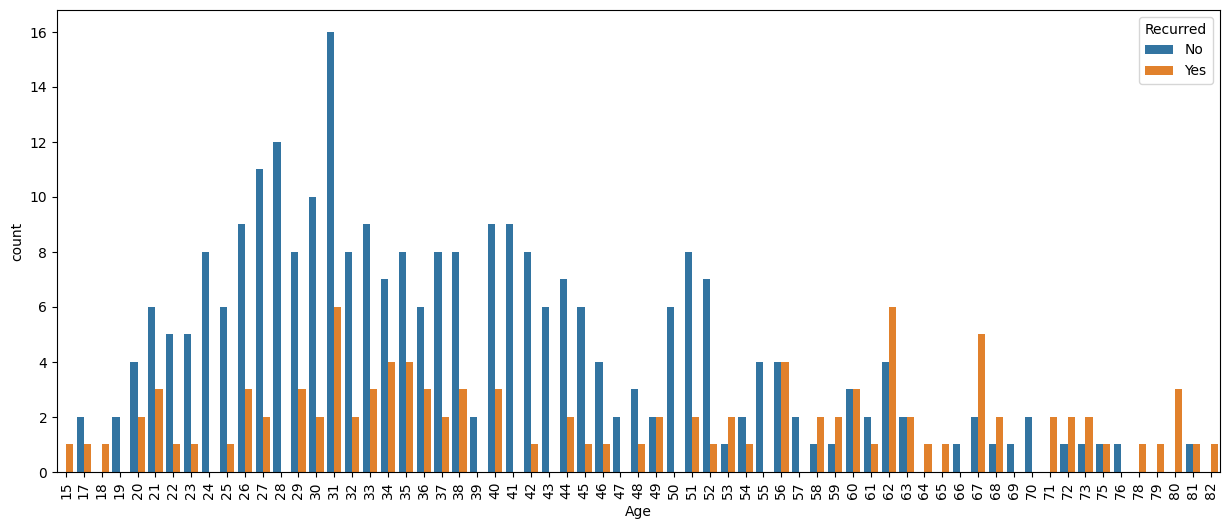

In [9]:
plt.figure(figsize=(15,6))
sns.countplot(x='Age', hue='Recurred', data=df)
plt.xticks(rotation=90)
plt.show()

In [10]:
df.columns

Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')

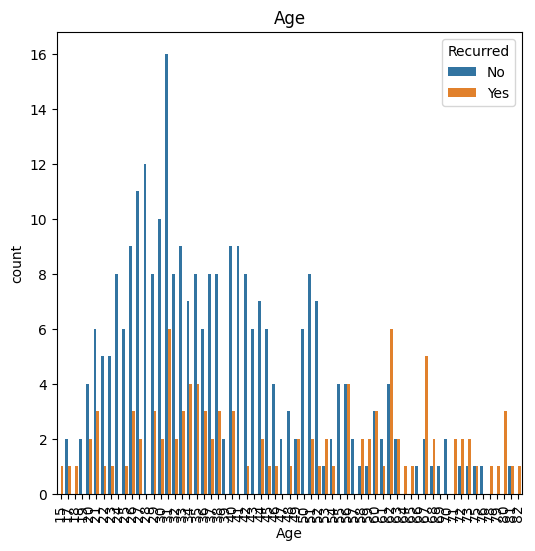

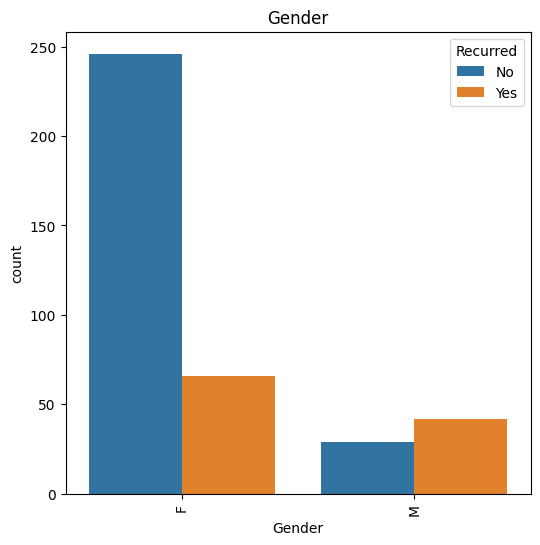

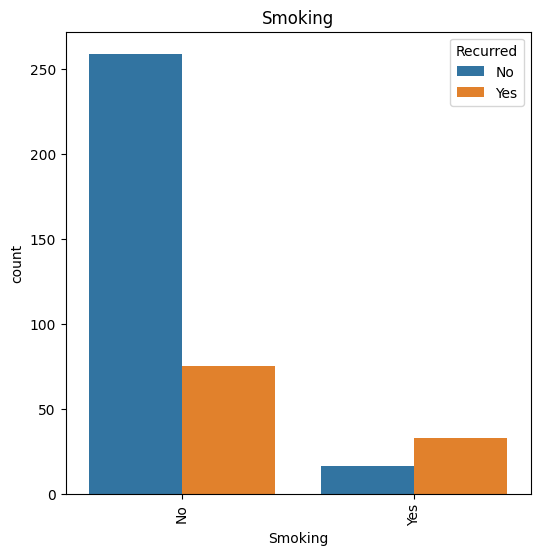

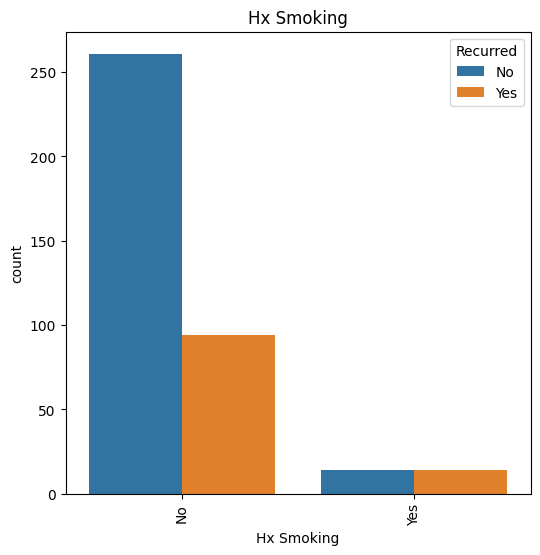

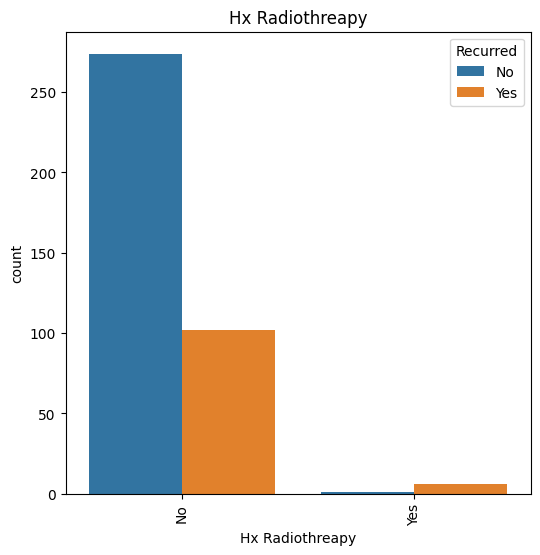

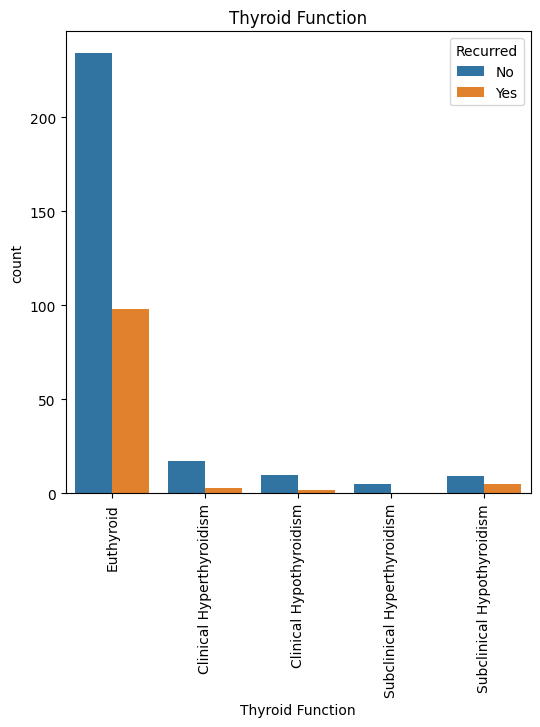

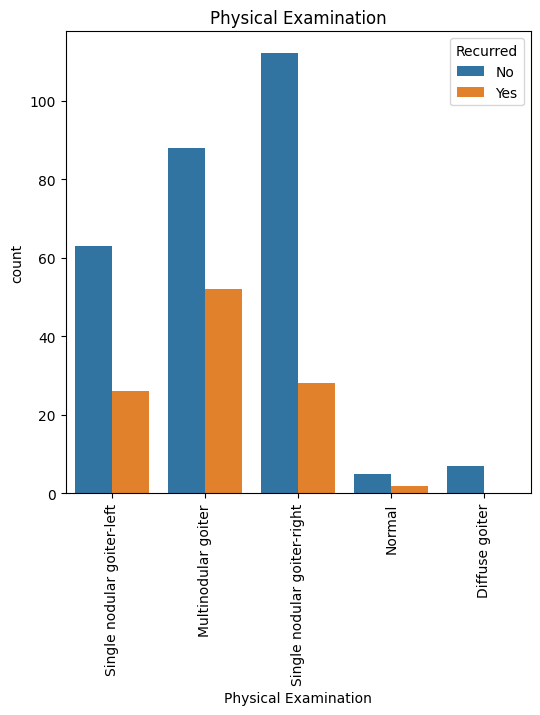

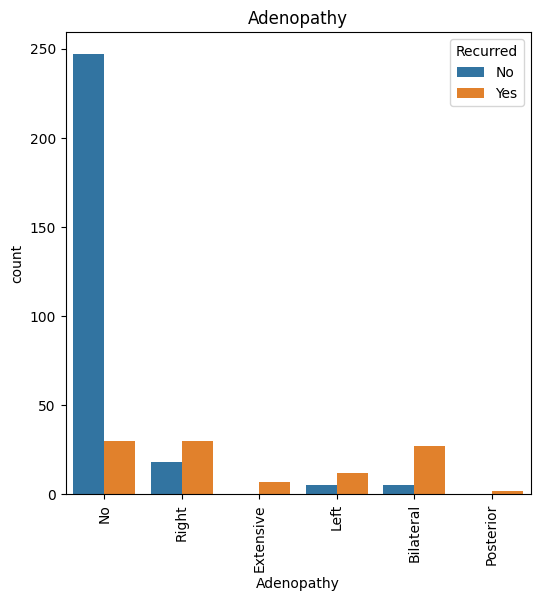

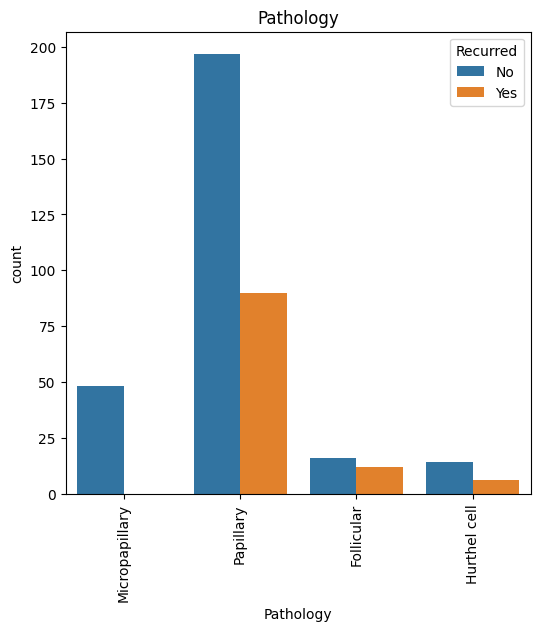

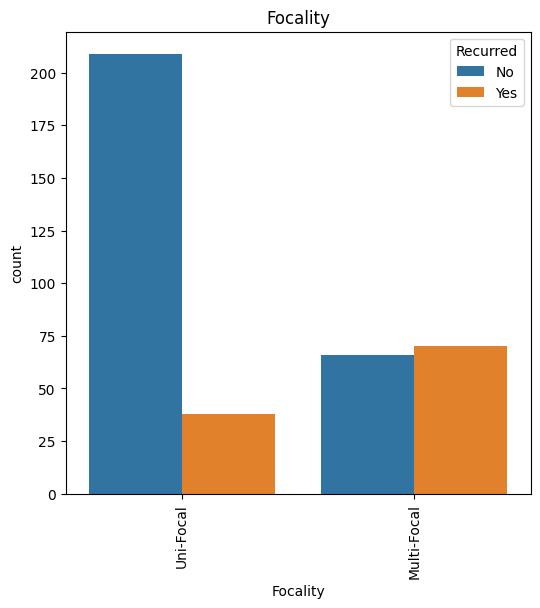

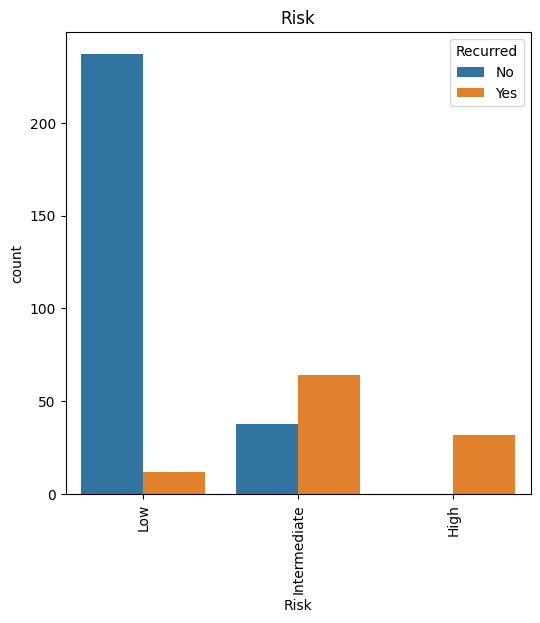

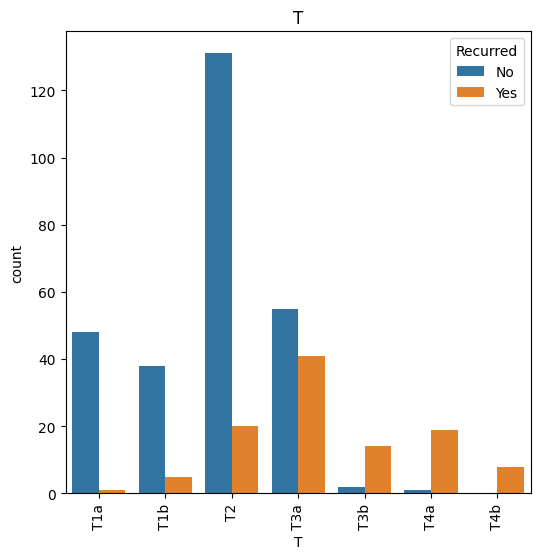

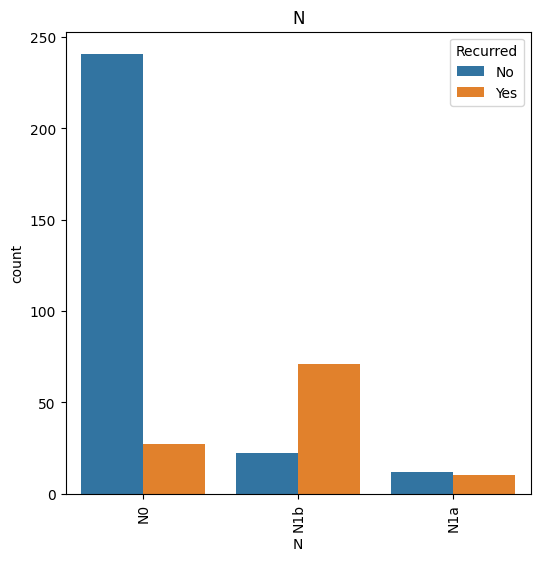

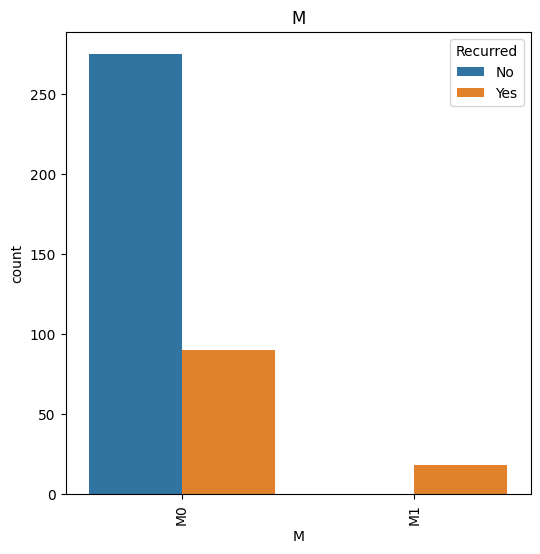

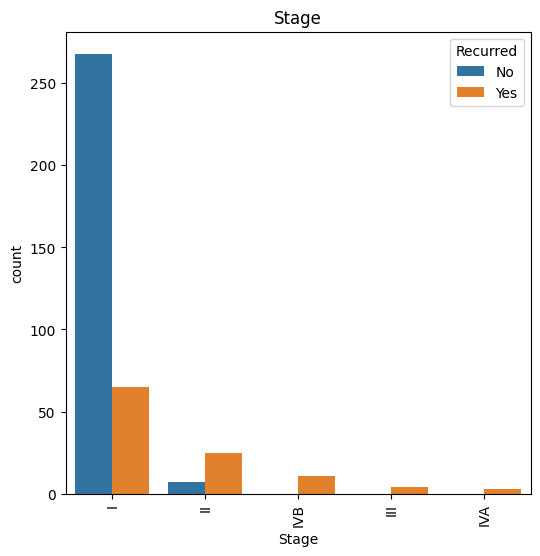

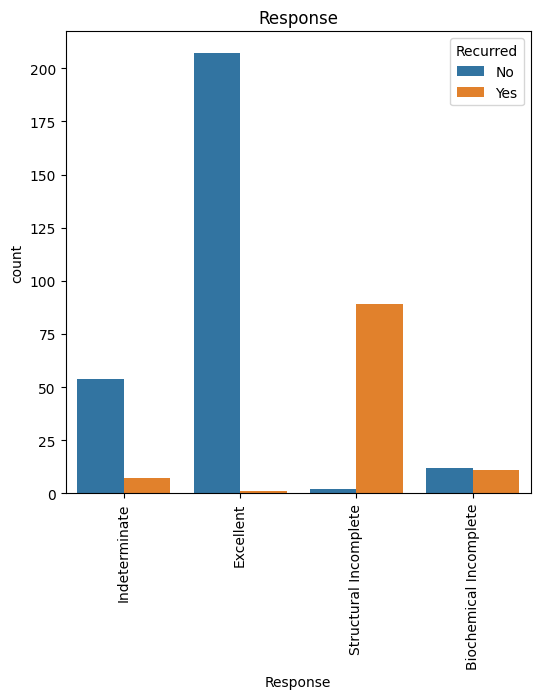

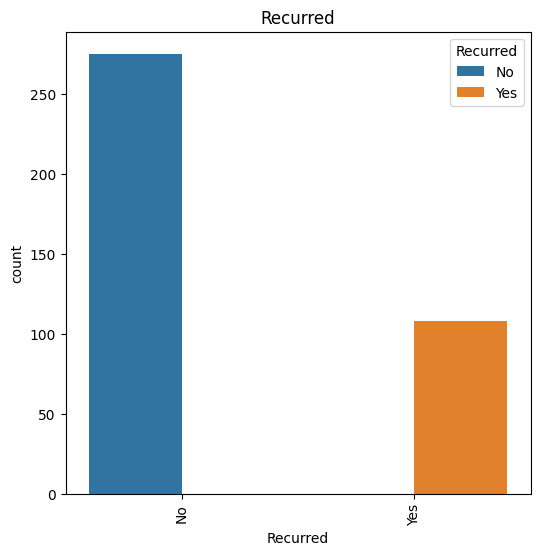

In [11]:
for cols in df.columns:
    plt.figure(figsize=(6,6))
    sns.countplot(x=cols, hue='Recurred', data=df)
    plt.xticks(rotation=90)
    plt.title(cols)
    plt.show()

In [12]:
dummies=pd.get_dummies(df)

In [13]:
from scipy.stats import chi2_contingency

In [14]:
p_values=[]
for cols in df.columns:
    contingency_table = pd.crosstab(df[cols], df['Recurred'])

    # Perform chi-square test
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"Column Name: {cols}")
    print("Chi-square statistic:", chi2)
    print("P-value:", p)
    p_values.append( p)

Column Name: Age
Chi-square statistic: 92.77966650306296
P-value: 0.010834025074581336
Column Name: Gender
Chi-square statistic: 39.396676469993665
P-value: 3.4588517738589313e-10
Column Name: Smoking
Chi-square statistic: 40.34407383079646
P-value: 2.1295039258824545e-10
Column Name: Hx Smoking
Chi-square statistic: 5.977474414669837
P-value: 0.014489737063609615
Column Name: Hx Radiothreapy
Chi-square statistic: 8.9360505479056
P-value: 0.002795966115812055
Column Name: Thyroid Function
Chi-square statistic: 5.14868693919497
P-value: 0.27237868540391813
Column Name: Physical Examination
Chi-square statistic: 12.974379341840015
P-value: 0.011401661887227106
Column Name: Adenopathy
Chi-square statistic: 157.04429320211565
P-value: 4.220720693153291e-32
Column Name: Pathology
Chi-square statistic: 23.27043458980044
P-value: 3.546645063731058e-05
Column Name: Focality
Chi-square statistic: 54.641643458629716
P-value: 1.4463803836917104e-13
Column Name: Risk
Chi-square statistic: 208.8262

In [15]:
col=[]
for cols in df.columns:
    col.append(cols)

In [16]:
p_values

[0.010834025074581336,
 3.4588517738589313e-10,
 2.1295039258824545e-10,
 0.014489737063609615,
 0.002795966115812055,
 0.27237868540391813,
 0.011401661887227106,
 4.220720693153291e-32,
 3.546645063731058e-05,
 1.4463803836917104e-13,
 4.50781577510179e-46,
 5.353537306538777e-28,
 5.443985431857947e-34,
 2.616836848791985e-11,
 3.1610731210091906e-20,
 8.863123780463506e-67,
 3.2632716475657637e-84]

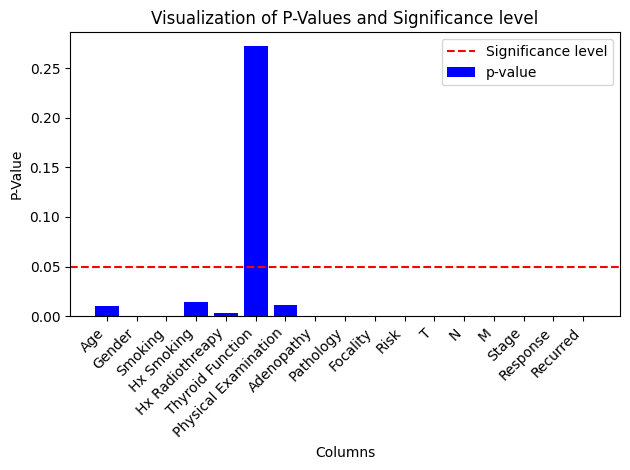

In [17]:
alpha=0.05
plt.bar(col,p_values,color='blue',label='p-value')
plt.axhline(y=alpha,color='red',linestyle='--',label='Significance level')
plt.xlabel('Columns')
plt.ylabel('P-Value')
plt.title('Visualization of P-Values and Significance level')
plt.xticks(rotation=45,ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [19]:
X=df.drop('Recurred',axis=1)
y=df['Recurred']

In [20]:
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
from imblearn.over_sampling import RandomOverSampler

In [22]:
ROS=RandomOverSampler(sampling_strategy='minority',random_state=42)

In [23]:
X_resampled, y_resampled = ROS.fit_resample(X, y)

In [24]:
X_resampled

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,18,F,No,No,No,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,Intermediate,T1b,N1b,M0,I,Structural Incomplete
546,68,F,No,No,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4a,N1b,M1,IVB,Structural Incomplete
547,38,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Right,Papillary,Multi-Focal,Intermediate,T2,N1b,M0,I,Structural Incomplete
548,46,M,Yes,No,No,Euthyroid,Single nodular goiter-left,Bilateral,Follicular,Uni-Focal,High,T4b,N1b,M1,II,Structural Incomplete


In [25]:
ohe=OneHotEncoder(drop='first',sparse=False)

In [26]:
X_encoded=ohe.fit_transform(X_resampled)
X__encoded=np.array(X_encoded,dtype=np.int32)

C:\Users\Aryan raina\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [27]:
cols_name=ohe.get_feature_names_out(X_resampled.columns)

In [28]:
X_encoded=pd.DataFrame(X_encoded,columns=cols_name)

In [29]:
X_encoded

,Age_17,Age_18,Age_19,Age_20,Age_21,Age_22,Age_23,Age_24,Age_25,Age_26,...,N_N1a,N_N1b,M_M1,Stage_II,Stage_III,Stage_IVA,Stage_IVB,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
547,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
548,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
le=LabelEncoder()

In [32]:
y_encoded=le.fit_transform(y_resampled)

In [33]:
y_encoded=np.array(y_encoded,dtype=np.int32)

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X_encoded,y_encoded,test_size=0.2,random_state=42)

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [37]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test))

Epoch 1/50
55/55 [==============================] - 2s 12ms/step - loss: 0.5061 - accuracy: 0.8182 - val_loss: 0.2738 - val_accuracy: 0.9273
Epoch 2/50
55/55 [==============================] - 0s 5ms/step - loss: 0.2283 - accuracy: 0.9045 - val_loss: 0.1415 - val_accuracy: 0.9545
Epoch 3/50
55/55 [==============================] - 0s 4ms/step - loss: 0.1395 - accuracy: 0.9318 - val_loss: 0.1079 - val_accuracy: 0.9636
Epoch 4/50
55/55 [==============================] - 0s 4ms/step - loss: 0.0907 - accuracy: 0.9727 - val_loss: 0.0722 - val_accuracy: 0.9636
Epoch 5/50
55/55 [==============================] - 0s 4ms/step - loss: 0.0621 - accuracy: 0.9864 - val_loss: 0.0687 - val_accuracy: 0.9636
Epoch 6/50
55/55 [==============================] - 0s 4ms/step - loss: 0.0427 - accuracy: 0.9932 - val_loss: 0.0641 - val_accuracy: 0.9545
Epoch 7/50
55/55 [==============================] - 0s 5ms/step - loss: 0.0310 - accuracy: 0.9932 - val_loss: 0.0554 - val_accuracy: 0.9636
Epoch 8/50
55/55 [=

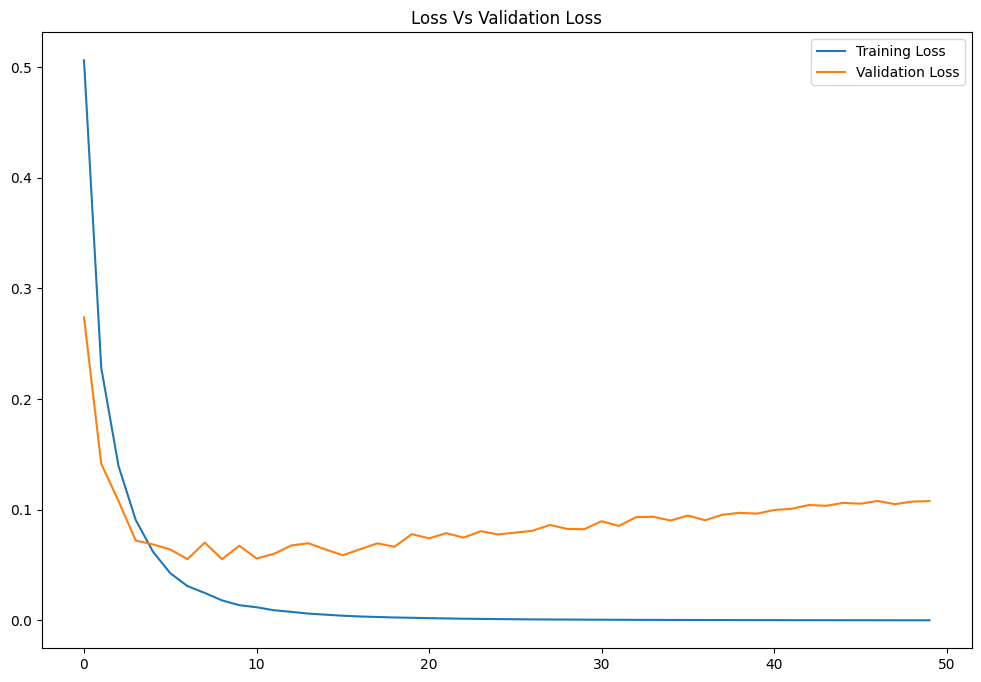

In [38]:
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.title("Loss Vs Validation Loss")
plt.legend()
plt.show()

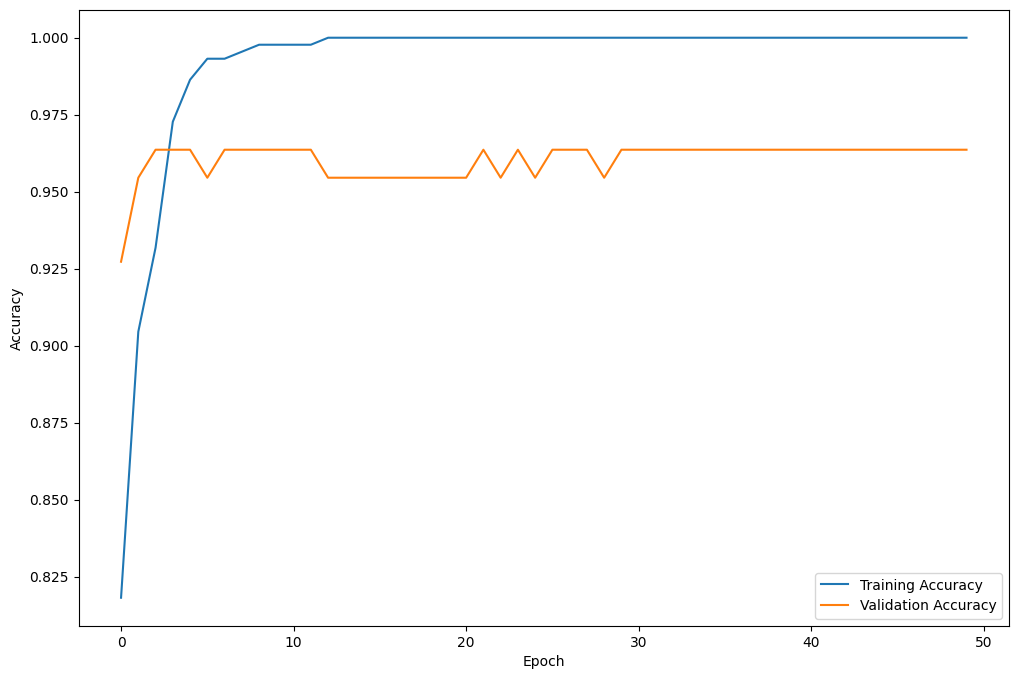

In [39]:
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rfc=RandomForestClassifier()

In [42]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [43]:
y_pred=rfc.predict(X_test)

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report

In [45]:
accuracy_score(y_test,y_pred)

0.9818181818181818

In [50]:
precision_score(y_test,y_pred)

0.9803921568627451

In [51]:
recall_score(y_test,y_pred)

0.9803921568627451

In [54]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.98      0.98      0.98        59\n           1       0.98      0.98      0.98        51\n\n    accuracy                           0.98       110\n   macro avg       0.98      0.98      0.98       110\nweighted avg       0.98      0.98      0.98       110\n'

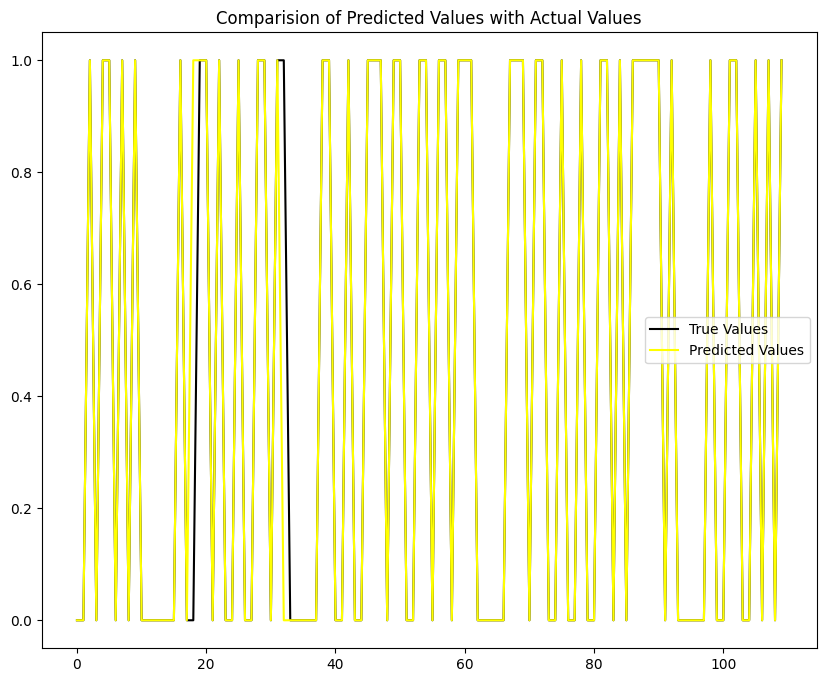

In [65]:
plt.figure(figsize=(10,8))
plt.plot(y_test,color='black',label='True Values')
plt.plot(y_pred,color='yellow',label='Predicted Values')
plt.legend()
plt.title("Comparision of Predicted Values with Actual Values")
plt.show()

In [66]:
import pickle

In [67]:
pickle.dump(rfc,open('rfccancer.pkl','wb'))

In [68]:
pickle.dump(ohe,open('ohecancer.pkl','wb'))

In [69]:
pickle.dump(ohe,open('lecancer.pkl','wb'))